In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import glob
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
directory = '/kaggle/input/birdclef-2023/train_audio'

filepaths = []
birds = []
train_data = pd.DataFrame()
for bird in os.listdir(directory):
    for sound in os.listdir(directory + '/' + bird):
        filepath = directory + '/' + bird + '/' + sound
        filepaths.append(filepath)
        birds.append(bird)
    
train_data['sounds'] = filepaths
train_data['bird'] = birds

In [3]:
train_data.drop_duplicates(subset='bird',inplace=True)

In [4]:
sound_test,sr = librosa.load(train_data['sounds'][0],sr=None)

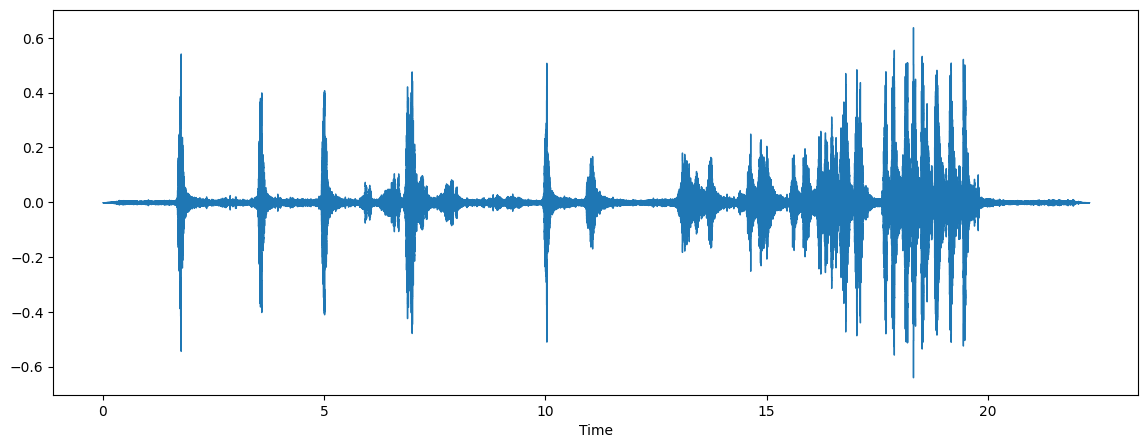

In [5]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(np.array(sound_test))

In [6]:
Audio(np.array(sound_test),rate = 32000)

In [7]:
sf.info(train_data['sounds'][0]).samplerate


32000

In [8]:
np.mean(librosa.feature.mfcc(y=np.array(sound_test),sr=sr,n_mfcc=20).T,axis=0)

array([-3.66091431e+02,  5.37039185e+00, -9.74579163e+01, -2.42924938e+01,
       -3.33865395e+01, -2.66526031e+01, -3.07641678e+01, -1.15921059e+01,
       -1.85858250e+01, -8.28550053e+00, -9.95310593e+00, -1.21076696e-01,
       -2.58096576e-01,  4.29976320e+00, -1.82430267e+00,  2.72755480e+00,
       -1.23968792e+00,  5.96804047e+00, -1.15855253e+00,  5.71627235e+00],
      dtype=float32)

[Text(0.5, 1.0, 'MFCC')]

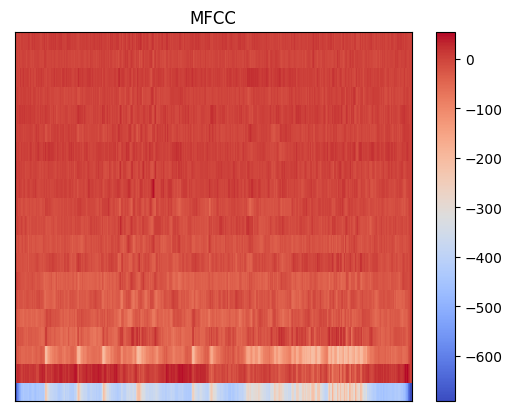

In [9]:
fig, ax = plt.subplots(nrows=1,sharex=True)
img = librosa.display.specshow(librosa.feature.mfcc(y=np.array(sound_test),sr=sr))
fig.colorbar(img,ax=[ax])
ax.set(title='MFCC')

In [10]:
mfcc_features = []
for sound in train_data['sounds']:
    audio , sr = librosa.load(sound,sr=None)
    single = np.mean(librosa.feature.mfcc(y = audio,sr=sr,n_mfcc=20).T,axis=0)
    mfcc_features.append(single)

In [11]:
map_list = list(map(list, zip(*mfcc_features)))
count = 1
for i in map_list:
    train_data[count] = i
    count += 1

In [12]:
train_data.tail()

,sounds,bird,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
16736,/kaggle/input/birdclef-2023/train_audio/egygoo...,egygoo,-327.562103,101.254448,-55.726097,-39.565933,-53.344044,-42.129311,-32.271030,-17.059259,...,-11.396674,-6.159515,-10.534609,-1.792274,-4.224256,-2.314571,-6.153171,-0.553855,-6.067465,-0.265321
16888,/kaggle/input/birdclef-2023/train_audio/rehwea...,rehwea1,-339.905212,52.716690,-29.358404,30.496525,-13.049085,-4.565211,-18.149456,-0.201456,...,2.488156,1.390554,-0.741014,0.109843,-0.356241,3.634870,-3.638200,-0.108099,-4.251381,-2.981101
16893,/kaggle/input/birdclef-2023/train_audio/fatwid...,fatwid1,-246.796631,69.189125,-92.051918,48.975803,-44.244827,10.885319,-8.669736,-3.016751,...,8.005650,-3.403398,3.033816,9.036267,-5.585237,16.451309,8.122865,-11.785598,7.100848,1.857547
16898,/kaggle/input/birdclef-2023/train_audio/blcapa...,blcapa2,-311.750732,102.616684,-54.904739,5.363670,-31.252701,-0.326818,-26.432568,-5.606936,...,-1.472991,-0.771208,-14.499262,1.745068,-11.420123,0.434384,-2.636673,-2.079024,-0.522445,-0.375546
16920,/kaggle/input/birdclef-2023/train_audio/edcsun...,edcsun3,-408.125122,50.044106,-26.418060,27.158260,-28.969965,-10.252546,-0.217747,1.763169,...,-7.775909,-0.783018,-12.357033,5.208118,2.109753,4.293735,-5.316986,-1.522233,-4.203270,6.825611


In [13]:
X_train = train_data.drop(['bird','sounds'],axis=1)
y_train = train_data['bird']

In [14]:
classifer = KNeighborsClassifier()

In [15]:
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
#audio,sr = librosa.load('/kaggle/input/birdclef-2023/test_soundscapes/soundscape_29201.ogg',sr=None)
#Audio(np.array(audio),rate = 32000)

In [17]:
offset = 0
duration = 5
mfcc_test = []
row_ids = []
filename = list(glob.glob("/kaggle/input/birdclef-2023/test_soundscapes/*.ogg"))
time_start = time.time()
for i in filename:
    count = 5
    chunk_end = 0 
    file_id = i.split(".ogg")[0].split("/")[-1]
    duration = sf.info(i).duration
    sound,sr = librosa.load(i,sr=None)
    points = int(duration/5)
    for x in range(points):
        row_ids.append(file_id + '_' + str(count))
        chunk_start = chunk_end
        chunk_end += sf.info(i).samplerate * 5
        count += 5
        mfcc = np.mean(librosa.feature.mfcc(y = np.array(sound[chunk_start:chunk_end]),sr=sr,n_mfcc=20).T,axis=0)
        mfcc_test.append(mfcc)
        offset += duration
        
time_end = time.time()

In [18]:
((time_end - time_start) * 200)/60

10.378632545471191

In [19]:
map_list_test = list(map(list, zip(*mfcc_test)))
count = 1
test_data = pd.DataFrame()
for i in map_list_test:
    test_data[count] = i
    count += 1

In [20]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-480.748108,76.170189,10.773297,12.757454,6.267485,7.359494,-0.633435,16.448973,7.766130,15.000321,4.067284,12.368649,1.758839,9.030389,0.419612,10.813042,3.425383,10.817577,-0.081639,8.545769
1,-481.375214,74.897186,14.804403,17.251265,3.261155,7.987760,1.209887,12.049182,2.907546,14.082338,4.130388,11.017200,-0.843548,8.081678,0.812752,9.969510,0.515867,10.133639,1.786774,8.660110
2,-464.834656,80.816383,8.547385,17.951498,4.594552,11.263083,9.846130,13.850920,-0.075025,13.515416,3.807899,13.128636,2.590130,7.893130,-1.427577,9.256434,-0.178311,9.056090,0.417479,9.033244
3,-457.681152,83.284409,2.173356,12.733613,9.074625,21.227474,15.098674,13.611512,-0.904423,16.444683,5.901612,9.838360,0.411852,8.378644,-1.699475,7.948098,0.203098,7.703158,-1.045549,9.063037
4,-474.149567,76.134247,3.305835,12.351949,14.392971,22.441910,9.698343,13.928277,1.865479,15.745355,7.582478,13.224422,1.913735,9.964212,0.291912,9.899728,2.379710,9.336022,-1.882917,7.573184


In [21]:
predictions = classifer.predict(test_data)

In [22]:
lb = preprocessing.LabelBinarizer()
lb.fit(train_data['bird'])
tran_pred = lb.transform(predictions)

In [23]:
tran_pred = tran_pred.astype('float64')

In [24]:
tran_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
pred = pd.DataFrame(columns=train_data['bird'].unique(),data=tran_pred) 

In [26]:
pred.sort_index(axis=1,inplace=True)

In [27]:
pred.insert(loc=0,column='row_id',value=row_ids)

In [28]:
pred.to_csv('submission.csv',index=False)

In [29]:
pred

,row_id,abethr1,abhori1,abythr1,afbfly1,afdfly1,afecuc1,affeag1,afgfly1,afghor1,...,yebsto1,yeccan1,yefcan,yelbis1,yenspu1,yertin1,yesbar1,yespet1,yetgre1,yewgre1
0,soundscape_29201_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,soundscape_29201_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,soundscape_29201_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,soundscape_29201_20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,soundscape_29201_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,soundscape_29201_580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,soundscape_29201_585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,soundscape_29201_590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,soundscape_29201_595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
